In [1]:
import gc
import pandas as pd
import numpy as np
train = pd.read_csv('C:/Users/VPVU2/Desktop/check/train.tsv', sep = '\t')
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [2]:
train.count()
train_len=len(train)
print(train_len)

1482535


In [3]:
import string
import re
from nltk.corpus import stopwords
punc_replace = []
for replace in string.punctuation:
    punc_replace.append((replace, ''))

def remove_punc(text):
    return text.translate(None, string.punctuation)


emoji_pattern = re.compile('('
'\ud83c[\udf00-\udfff]|'
'\ud83d[\udc00-\ude4f\ude80-\udeff]|'
'[\u2600-\u26FF\u2700-\u27BF])+'.decode('unicode_escape'), 
re.UNICODE)

def remove_emoji(text):
    return emoji_pattern.sub('', text.decode('utf-8'))
def remove_num(num):
    num = ''.join([i for i in num if not i.isdigit()])
    return num
def to_lower(text):
    return text.lower()
stopword = set(stopwords.words('english'))
def remove_swords(text):
    text = ' '.join([i for i in text.lower().split(' ') if i not in stopword])
    return text

In [4]:
import numpy as np
train['logprice']=np.log(train['price']+1)
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,logprice
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,2.397895
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,3.970292
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,2.397895
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,3.583519
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,3.806662


In [5]:
def category(category_name):
    try:
        var1, var2, var3 = category_name.split('/')
        return var1, var2, var3
    except:
        return np.nan, np.nan, np.nan

train['category1'], train['category2'],train['category3']= zip(*train['category_name'].apply(category))
category_train = train[['category1','category2','category3','logprice']]
category_train.head()

,category1,category2,category3,logprice
0,Men,Tops,T-shirts,2.397895
1,Electronics,Computers & Tablets,Components & Parts,3.970292
2,Women,Tops & Blouses,Blouse,2.397895
3,Home,Home Décor,Home Décor Accents,3.583519
4,Women,Jewelry,Necklaces,3.806662


In [6]:
def handle_missing_inplace(dataset):
    dataset['category1'].fillna(value='missing', inplace=True)
    dataset['category2'].fillna(value='missing', inplace=True)
    dataset['category3'].fillna(value='missing', inplace=True)
    dataset['brand_name'].fillna(value='missing', inplace=True)
    dataset['item_description'].fillna(value='missing', inplace=True)

In [7]:

handle_missing_inplace(train)

In [8]:
def replace_missing(df):
    
    df['brand_name'].fillna(value='None', inplace=True)
    df['item_description'].fillna(value='None', inplace=True)

In [9]:
def type_category(df):
    df['brand_name']=df['brand_name'].astype('category')

    df['item_condition_id']=df['item_condition_id'].astype('category')

In [10]:
replace_missing(train)
type_category(train)

In [11]:
# Remove Punctuation
train.item_description = train.item_description.astype(str)

train['item_description'] = train['item_description'].apply(remove_num)
train['item_description'] = train['item_description'].apply(remove_punc)
train['item_description'] = train['item_description'].apply(remove_swords)
train['item_description'] = train['item_description'].apply(to_lower)
train['item_description'] = train['item_description'].apply(remove_emoji)


In [12]:
train.name = train.name.astype(str)
train['name'] = train['name'].apply(remove_num)
train['name'] = train['name'].apply(remove_punc)
train['name'] = train['name'].apply(remove_swords)
train['name'] = train['name'].apply(to_lower)
train['name'] = train['name'].apply(remove_emoji)

In [13]:
train.category1 = train.category1.astype(str)
train['category1'] = train['category1'].apply(remove_num)
train['category1'] = train['category1'].apply(remove_punc)
train['category1'] = train['category1'].apply(remove_swords)
train['category1'] = train['category1'].apply(to_lower)
train['category1'] = train['category1'].apply(remove_emoji)

In [14]:
train.category2 = train.category2.astype(str)
train.category3 = train.category3.astype(str)
train['category2'] = train['category2'].apply(remove_num)
train['category2'] = train['category2'].apply(remove_punc)
train['category2'] = train['category2'].apply(remove_swords)
train['category2'] = train['category2'].apply(to_lower)
train['category2'] = train['category2'].apply(remove_emoji)

train['category3'] = train['category3'].apply(remove_num)
train['category3'] = train['category3'].apply(remove_punc)
train['category3'] = train['category3'].apply(remove_swords)
train['category3'] = train['category3'].apply(to_lower)
train['category3'] = train['category3'].apply(remove_emoji)
train.head(3)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,logprice,category1,category2,category3
0,0,mlb cincinnati reds shirt size xl,3,Men/Tops/T-shirts,missing,10.0,1,description yet,2.397895,men,tops,tshirts
1,1,razer blackwidow chroma keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,keyboard great condition works like came box p...,3.970292,electronics,computers tablets,components parts
2,2,avaviv blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,adorable top hint lace key hole back pale pink...,2.397895,women,tops blouses,blouse


In [15]:

train.isnull().any()

train_id             False
name                 False
item_condition_id    False
category_name         True
brand_name           False
price                False
shipping             False
item_description     False
logprice             False
category1            False
category2            False
category3            False
dtype: bool

In [16]:
mean_log=train['logprice'].mean()

In [17]:
train['rate'] = np.where(train['logprice']<mean_log, 0, 1)

In [18]:

train=train.drop(columns=['category_name'])
train.head()

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,logprice,category1,category2,category3,rate
0,0,mlb cincinnati reds shirt size xl,3,missing,10.0,1,description yet,2.397895,men,tops,tshirts,0
1,1,razer blackwidow chroma keyboard,3,Razer,52.0,0,keyboard great condition works like came box p...,3.970292,electronics,computers tablets,components parts,1
2,2,avaviv blouse,1,Target,10.0,1,adorable top hint lace key hole back pale pink...,2.397895,women,tops blouses,blouse,0
3,3,leather horse statues,1,missing,35.0,1,new tags leather horses retail rm stand foot h...,3.583519,home,home décor,home décor accents,1
4,4,k gold plated rose,1,missing,44.0,0,complete certificate authenticity,3.806662,women,jewelry,necklaces,1


In [19]:
train_df = train[['brand_name','name','item_description','category1','category2','category3','train_id','shipping','item_condition_id','rate']]
train_df.head()

,brand_name,name,item_description,category1,category2,category3,train_id,shipping,item_condition_id,rate
0,missing,mlb cincinnati reds shirt size xl,description yet,men,tops,tshirts,0,1,3,0
1,Razer,razer blackwidow chroma keyboard,keyboard great condition works like came box p...,electronics,computers tablets,components parts,1,0,3,1
2,Target,avaviv blouse,adorable top hint lace key hole back pale pink...,women,tops blouses,blouse,2,1,1,0
3,missing,leather horse statues,new tags leather horses retail rm stand foot h...,home,home décor,home décor accents,3,1,1,1
4,missing,k gold plated rose,complete certificate authenticity,women,jewelry,necklaces,4,0,1,1


In [20]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [21]:
women_cat=train_df.loc[train_df['category1'] == "women"].head(5000)
woman_cat1=women_cat

In [22]:
woman_df=train_df.loc[train_df['category1'] == "women"].head(5000)
woman_df

,brand_name,name,item_description,category1,category2,category3,train_id,shipping,item_condition_id,rate
2,Target,avaviv blouse,adorable top hint lace key hole back pale pink...,women,tops blouses,blouse,2,1,1,0
4,missing,k gold plated rose,complete certificate authenticity,women,jewelry,necklaces,4,0,1,1
5,missing,bundled items requested ruie,banana republic bottoms candies skirt matching...,women,,,5,0,3,1
6,Acacia Swimwear,acacia pacific tides santorini top,size small straps slightly shortened fit xs be...,women,swimwear,twopiece,6,0,3,1
12,rue,black skater dress,xl great condition,women,dresses,knee mini,12,0,2,0
14,UGG Australia,hold dogs minnetonka boots,authentic suede fringe boots great condition s...,women,shoes,boots,14,0,3,1
19,Anthropologie,cream beige front cross shirt,fancy dressy casual dress polyester washed ne...,women,tops blouses,blouse,19,0,2,1
20,Torrid,torrid nautical peplum tube top,size worn excellent condition,women,tops blouses,tank cami,20,1,3,0
21,Victoria's Secret,nwt vs ultimate sports bra ddd,nwt victorias secret ultimate sport bra maximu...,women,athletic apparel,sports bras,21,0,1,1
24,FOREVER 21,black red baseball tee,lanascloset description never worn deleteupd...,women,tops blouses,tshirts,24,0,2,0


In [23]:
women_cat

,brand_name,name,item_description,category1,category2,category3,train_id,shipping,item_condition_id,rate
2,Target,avaviv blouse,adorable top hint lace key hole back pale pink...,women,tops blouses,blouse,2,1,1,0
4,missing,k gold plated rose,complete certificate authenticity,women,jewelry,necklaces,4,0,1,1
5,missing,bundled items requested ruie,banana republic bottoms candies skirt matching...,women,,,5,0,3,1
6,Acacia Swimwear,acacia pacific tides santorini top,size small straps slightly shortened fit xs be...,women,swimwear,twopiece,6,0,3,1
12,rue,black skater dress,xl great condition,women,dresses,knee mini,12,0,2,0
14,UGG Australia,hold dogs minnetonka boots,authentic suede fringe boots great condition s...,women,shoes,boots,14,0,3,1
19,Anthropologie,cream beige front cross shirt,fancy dressy casual dress polyester washed ne...,women,tops blouses,blouse,19,0,2,1
20,Torrid,torrid nautical peplum tube top,size worn excellent condition,women,tops blouses,tank cami,20,1,3,0
21,Victoria's Secret,nwt vs ultimate sports bra ddd,nwt victorias secret ultimate sport bra maximu...,women,athletic apparel,sports bras,21,0,1,1
24,FOREVER 21,black red baseball tee,lanascloset description never worn deleteupd...,women,tops blouses,tshirts,24,0,2,0


In [24]:
women_cat_total=train.loc[train['category1'] == "women"].head(5000)
women_cat_price=women_cat_total['logprice']
df = women_cat_price.rename_axis('train_id').reset_index(name='unique_values')
print (df)

      train_id  unique_values
0            2       2.397895
1            4       3.806662
2            5       4.094345
3            6       4.174387
4           12       2.833213
5           14       3.784190
6           19       3.332205
7           20       2.639057
8           21       3.044522
9           24       2.397895
10          27       3.218876
11          28       1.791759
12          29       2.833213
13          31       3.931826
14          32       3.135494
15          35       2.639057
16          36       5.347108
17          39       2.397895
18          41       2.639057
19          45       3.951244
20          47       3.091042
21          48       4.007333
22          50       4.744932
23          53       2.079442
24          60       4.787492
25          61       3.931826
26          62       2.564949
27          63       2.564949
28          66       2.772589
29          67       2.833213
...        ...            ...
4970     11268       3.806662
4971     1

In [25]:
tv = TfidfVectorizer(max_features = 50000, ngram_range=(1,2), stop_words = 'english')
matrix_description = tv.fit_transform(women_cat['name'])

In [26]:
feature_names = tv.get_feature_names() 
txt_features_names = feature_names
txt_features_names

[u'aa',
 u'aa black',
 u'abalone',
 u'abalone gold',
 u'abbydoo',
 u'abercrombie',
 u'abercrombie fitch',
 u'abercrombie winter',
 u'abounding',
 u'abounding heart',
 u'acacia',
 u'acacia bundle',
 u'acacia pacific',
 u'acacia white',
 u'accent',
 u'accent gold',
 u'accessories',
 u'acemi',
 u'acemi body',
 u'active',
 u'active leggings',
 u'active shorts',
 u'adaria',
 u'add',
 u'add cup',
 u'addict',
 u'adhesive',
 u'adhesive bra',
 u'adhesive sticky',
 u'adidas',
 u'adidas athletic',
 u'adidas basketball',
 u'adidas canvas',
 u'adidas crew',
 u'adidas crop',
 u'adidas flashback',
 u'adidas hoodie',
 u'adidas joggers',
 u'adidas laptop',
 u'adidas leggings',
 u'adidas nmd',
 u'adidas nmdr',
 u'adidas originals',
 u'adidas pants',
 u'adidas reebok',
 u'adidas samoa',
 u'adidas samoas',
 u'adidas shirt',
 u'adidas shoes',
 u'adidas shorts',
 u'adidas sleek',
 u'adidas small',
 u'adidas sneaker',
 u'adidas soccer',
 u'adidas superstars',
 u'adidas track',
 u'adidas tracksuit',
 u'adidas

In [27]:
for txt_f in txt_features_names:
    women_cat[txt_f] = list(map(lambda x: 1 if x.find(txt_f) != -1 else 0,women_cat.name))

In [28]:
cv = CountVectorizer()

matrix_category1 = cv.fit_transform(women_cat['category1'])
matrix_category2 = cv.fit_transform(women_cat['category2'])
matrix_category3 = cv.fit_transform(women_cat['category3'])


In [29]:
tv = TfidfVectorizer(max_features = 50000, ngram_range=(1,2), stop_words = 'english')
matrix_description = tv.fit_transform(women_cat['item_description'])

In [30]:
feature_names = tv.get_feature_names() 
txt_features = feature_names
txt_features

[u'aa',
 u'aa great',
 u'aa reference',
 u'aa uo',
 u'aaa',
 u'aaa cubic',
 u'aaa grade',
 u'aac',
 u'aac cup',
 u'ab',
 u'abalone',
 u'abalone shell',
 u'abbot',
 u'abbot main',
 u'abc',
 u'abc charm',
 u'abc mind',
 u'abc red',
 u'abcd',
 u'abcd dd',
 u'abercrombie',
 u'abercrombie american',
 u'abercrombie fitch',
 u'abercrombie flower',
 u'abercrombie harley',
 u'abercrombie hollister',
 u'abercrombie kids',
 u'abercrombie leg',
 u'abh',
 u'abh boots',
 u'ability',
 u'ability rate',
 u'able',
 u'able assist',
 u'able cleaned',
 u'able dry',
 u'able nurse',
 u'able rate',
 u'able remove',
 u'able restock',
 u'able score',
 u'able ship',
 u'able straightened',
 u'able track',
 u'able unlatch',
 u'able use',
 u'able walmart',
 u'abs',
 u'abs hahaa',
 u'absolute',
 u'absolute best',
 u'absolutely',
 u'absolutely beautiful',
 u'absolutely famous',
 u'absolutely flaws',
 u'absolutely gorgeous',
 u'absolutely holds',
 u'absolutely love',
 u'absolutely phenomenal',
 u'absolutely rips',
 u'

In [31]:
for txt_f in txt_features:
    women_cat[txt_f] = list(map(lambda x: 1 if x.find(txt_f) != -1 else 0,women_cat.item_description))

# Random forest 

In [32]:
import sklearn

In [33]:
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:

women_cat['category1'] = pd.factorize(women_cat['category1'])[0] + 1
women_cat['category2'] = pd.factorize(women_cat['category2'])[0] + 1
women_cat['category3'] = pd.factorize(women_cat['category3'])[0] + 1
women_cat['brand_name'] = pd.factorize(women_cat['brand_name'])[0] + 1

women_cat
test=women_cat

In [35]:
women_cat_price=women_cat['train_id']
train_df =women_cat_price.values
train_df 

array([    2,     4,     5, ..., 11329, 11330, 11333], dtype=int64)

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X=cv.fit_transform(list(women_cat['item_description']))
counts=pd.DataFrame(X.toarray(),columns=cv.get_feature_names())
count_sum=counts.sum()
counts=counts.drop(count_sum[(count_sum<30)].index,axis=1)

In [37]:
counts['train_id']=train_df 
counts

,adidas,adjustable,also,always,american,approx,around,ask,attached,authentic,...,worn,would,xl,xs,yellow,yet,yoga,zip,zipper,train_id
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,6
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,12
5,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,14
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19
7,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,20
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21
9,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,24


In [38]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X=cv.fit_transform(list(women_cat['name']))
count_1=pd.DataFrame(X.toarray(),columns=cv.get_feature_names())
count_sum=counts.sum()
counts_1=counts.drop(count_sum[(count_sum<5)].index,axis=1)
counts_1['train_id']=train_df 
counts

,adidas,adjustable,also,always,american,approx,around,ask,attached,authentic,...,worn,would,xl,xs,yellow,yet,yoga,zip,zipper,train_id
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,6
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,12
5,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,14
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19
7,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,20
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21
9,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,24


In [39]:
new = women_cat.filter(['category1','train_id','category3','category2','brand_name','item_condition_id','shipping'], axis=1)
new

,category1,train_id,category3,category2,brand_name,item_condition_id,shipping
2,1,2,1,1,1,1,0
4,1,4,2,2,2,1,0
5,1,5,3,3,2,3,0
6,1,6,4,4,3,3,0
12,1,12,5,5,4,2,0
14,1,14,6,6,5,3,0
19,1,19,1,1,6,2,0
20,1,20,7,1,7,3,0
21,1,21,8,7,8,1,0
24,1,24,9,1,9,2,0


In [40]:
womn_corr= pd.merge(counts, new,on='train_id', how='outer')
womn_corr

,adidas,adjustable,also,always,american,approx,around,ask,attached,authentic,...,yoga,zip,zipper,train_id,category1,category3,category2,brand_name,item_condition_id,shipping_y
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,2,1,1,1,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4,1,2,2,2,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,5,1,3,3,2,3,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,6,1,4,4,3,3,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,12,1,5,5,4,2,0
5,0,0,0,0,0,0,0,0,0,1,...,0,0,0,14,1,6,6,5,3,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,19,1,1,1,6,2,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,20,1,7,1,7,3,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,21,1,8,7,8,1,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,24,1,9,1,9,2,0


In [41]:
womn_corr.columns

Index([           u'adidas',        u'adjustable',              u'also',
                  u'always',          u'american',            u'approx',
                  u'around',               u'ask',          u'attached',
               u'authentic',
       ...
                    u'yoga',               u'zip',            u'zipper',
                u'train_id',         u'category1',         u'category3',
               u'category2',        u'brand_name', u'item_condition_id',
              u'shipping_y'],
      dtype='object', length=450)

In [42]:
%matplotlib inline
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import sklearn

data= womn_corr.values
RobustScaler=RobustScaler()
traindf=RobustScaler.fit_transform(data)



#create final dataset for cleaning and building a predictive model
X= data
y = df['unique_values']
from sklearn.model_selection import train_test_split
X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(X, y, test_size=0.30, random_state=42)

In [43]:


max_features_range = ['auto', 'sqrt', 0.2]
min_samples_leaf_range = [10, 50, 70]
n_estimator_range=[10,100,1000]
param_grid = dict(max_features = max_features_range, min_samples_leaf = min_samples_leaf_range,n_estimators=n_estimator_range)
cv = sklearn.model_selection.KFold(n_splits=10, shuffle=False, random_state=44)
grid = GridSearchCV(RandomForestRegressor(criterion='mse', n_jobs= -1, random_state= 44), param_grid=param_grid, cv=cv, scoring='neg_mean_squared_error')
grid.fit(X_train_np, y_train_np)
print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

The best parameters are {'max_features': 'auto', 'n_estimators': 1000, 'min_samples_leaf': 10} with a score of -0.38


In [44]:
regr = RandomForestRegressor(n_estimators = 1000,max_depth=None, max_features="auto", 
                        min_samples_split=10, min_samples_leaf=10,
                        random_state=44, n_jobs=-1)
regr.fit(X_train_np, y_train_np)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=44, verbose=0, warm_start=False)

In [45]:
print(regr.feature_importances_)

[0.00000000e+00 3.33739162e-04 0.00000000e+00 0.00000000e+00
 4.87828976e-05 0.00000000e+00 0.00000000e+00 6.60892907e-05
 0.00000000e+00 6.76983445e-02 0.00000000e+00 0.00000000e+00
 8.37154681e-05 5.94652080e-05 5.85975349e-03 1.38308958e-05
 0.00000000e+00 0.00000000e+00 1.48769998e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.98093631e-03 0.00000000e+00 0.00000000e+00 5.35321489e-04
 6.07035055e-05 0.00000000e+00 0.00000000e+00 4.48435435e-05
 1.97682578e-05 1.01735977e-04 1.80375855e-04 7.58922173e-03
 6.30428077e-04 3.06146340e-04 4.58491695e-03 1.27850661e-05
 0.00000000e+00 1.60979987e-05 1.24115614e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.62657499e-05 0.00000000e+00
 4.14527296e-06 2.04501556e-05 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.33689533e-04 4.03829724e-06 7.99231206e-04 0.00000000e+00
 5.69368262e-06 0.000000

In [46]:
print(regr.score(X_test_np,y_test_np))

0.296066578009758


In [47]:
print(regr.score(X_train_np, y_train_np))

0.49329042354439134


In [48]:
import matplotlib.pyplot as plt

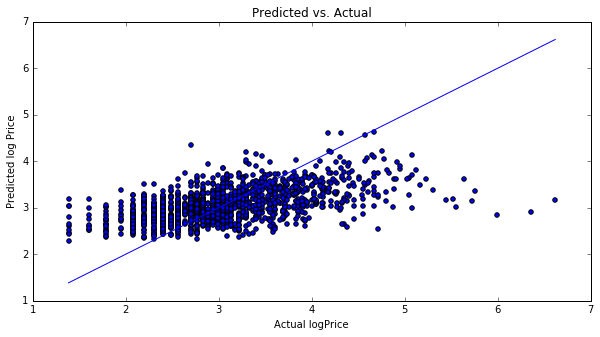

In [49]:
y_pred = regr.predict(X_test_np)
plt.figure(figsize=(10, 5))
plt.scatter(y_test_np , y_pred)
plt.plot([min(y_test_np), max(y_test_np )], [min(y_test_np ), max(y_test_np )])
plt.title('Predicted vs. Actual')
plt.xlabel('Actual logPrice')
plt.ylabel('Predicted log Price')
plt.show()

In [50]:
from sklearn.model_selection import cross_val_score
cv_score = np.sqrt(-cross_val_score(regr, 
                                    X, 
                                    y, 
                                    cv=2, 
                                    scoring = "neg_mean_squared_error"))
print("RMSE Score: {}".format(cv_score.mean()))

RMSE Score: 0.625278594455


In [51]:
feature_importances = pd.DataFrame(regr.feature_importances_,index = womn_corr.columns,columns=['importance']).sort_values('importance',  ascending=False)                        

In [52]:
feature_importances.head(10)

,importance
category2,0.203357
brand_name,0.188134
train_id,0.107582
category3,0.105331
authentic,0.067698
item_condition_id,0.065248
dust,0.062607
leather,0.027165
new,0.018977
beautiful,0.014877


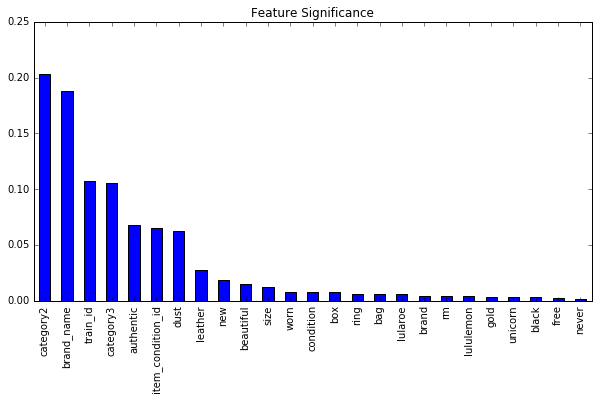

In [53]:
coef = pd.Series(regr.feature_importances_, index = womn_corr.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
coef.head(25).plot(kind='bar')
plt.title('Feature Significance')
plt.show()

# Regession

In [54]:
woman_df.head()
%matplotlib inline

In [55]:
from sklearn import preprocessing
cv = CountVectorizer(min_df=10)
X_name= cv.fit_transform(woman_df['name'])

cv = CountVectorizer()
X_category1 = cv.fit_transform(woman_df['category1'])
X_category2= cv.fit_transform(woman_df['category2'])
X_category3= cv.fit_transform(woman_df['category3'])


tv = TfidfVectorizer(max_features=55000, ngram_range=(1, 2), stop_words='english')
X_description = tv.fit_transform(woman_df['item_description'])

lb = preprocessing.LabelBinarizer(sparse_output=True)
x_brand = lb.fit_transform(woman_df['brand_name'])


In [56]:
woman_df['item_condition_id']=woman_df['item_condition_id'].astype(int)

In [57]:
from scipy.sparse import csr_matrix
from scipy.sparse import hstack
# Create our final sparse matrix
X_dummies = csr_matrix(pd.get_dummies(woman_df[['item_condition_id', 'shipping']], sparse=True).values)

# Combine everything together
sparse_merge = hstack((X_dummies, X_description, x_brand, X_category1, X_category2, X_category3, X_name)).tocsr()

In [58]:
sparse_merge

<5000x48467 sparse matrix of type '<type 'numpy.float64'>'
	with 168865 stored elements in Compressed Sparse Row format>

In [59]:
woman_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 2 to 11333
Data columns (total 10 columns):
brand_name           5000 non-null category
name                 5000 non-null object
item_description     5000 non-null object
category1            5000 non-null object
category2            5000 non-null object
category3            5000 non-null object
train_id             5000 non-null int64
shipping             5000 non-null int64
item_condition_id    5000 non-null int32
rate                 5000 non-null int32
dtypes: category(1), int32(2), int64(2), object(5)
memory usage: 558.9+ KB


In [60]:
woman_df

,brand_name,name,item_description,category1,category2,category3,train_id,shipping,item_condition_id,rate
2,Target,avaviv blouse,adorable top hint lace key hole back pale pink...,women,tops blouses,blouse,2,1,1,0
4,missing,k gold plated rose,complete certificate authenticity,women,jewelry,necklaces,4,0,1,1
5,missing,bundled items requested ruie,banana republic bottoms candies skirt matching...,women,,,5,0,3,1
6,Acacia Swimwear,acacia pacific tides santorini top,size small straps slightly shortened fit xs be...,women,swimwear,twopiece,6,0,3,1
12,rue,black skater dress,xl great condition,women,dresses,knee mini,12,0,2,0
14,UGG Australia,hold dogs minnetonka boots,authentic suede fringe boots great condition s...,women,shoes,boots,14,0,3,1
19,Anthropologie,cream beige front cross shirt,fancy dressy casual dress polyester washed ne...,women,tops blouses,blouse,19,0,2,1
20,Torrid,torrid nautical peplum tube top,size worn excellent condition,women,tops blouses,tank cami,20,1,3,0
21,Victoria's Secret,nwt vs ultimate sports bra ddd,nwt victorias secret ultimate sport bra maximu...,women,athletic apparel,sports bras,21,0,1,1
24,FOREVER 21,black red baseball tee,lanascloset description never worn deleteupd...,women,tops blouses,tshirts,24,0,2,0


In [61]:



X= sparse_merge
y = df['unique_values']


In [62]:
from sklearn.model_selection import train_test_split
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size = 0.15, random_state = 42) 


In [63]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

params={'alpha': [0.1,0.5,50,100,500,1000],'max_iter': [1,50,100,200],'random_state': [101,501,1001],'tol':[0.1,0.01]}
rdg_reg = Ridge()
clf = GridSearchCV(rdg_reg,params,cv=2,verbose = 1, scoring = 'neg_mean_squared_error')
clf.fit(train_X, train_y)

print(clf.best_params_)
print(clf.best_score_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\VPVU2\Anaconda3\envs\tutorial\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done 288 out of 288 | elapsed:   11.0s finished


Fitting 2 folds for each of 144 candidates, totalling 288 fits
{'alpha': 0.5, 'max_iter': 50, 'tol': 0.1, 'random_state': 101}
-0.32194861135050046


In [64]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
ridgereg = Ridge(alpha =0.5, copy_X= True, fit_intercept=True, max_iter =50, normalize=False, random_state=101, solver='auto', tol=0.1)
ridgereg.fit(train_X,train_y)
y_pred = ridgereg.predict(valid_X)
y_pred

array([3.76679283, 2.29727857, 3.1605767 , 3.99048743, 3.40345572,
       4.35976739, 2.39604051, 3.11793329, 3.69262796, 2.81780852,
       2.91439173, 2.78756057, 3.24612101, 2.52605584, 2.82797981,
       3.40660452, 2.8728908 , 2.43870051, 2.74690106, 2.82194057,
       2.20197852, 2.99057985, 2.07006854, 2.58010424, 2.49286919,
       3.29293705, 2.45784761, 3.66022297, 3.37760583, 2.49536678,
       2.92911945, 3.51038764, 3.39680643, 3.0535778 , 2.86316003,
       2.41491523, 3.23729538, 3.18395441, 3.11573206, 2.36501826,
       3.41964444, 2.83502336, 2.93368915, 3.17944629, 2.53399385,
       2.4989818 , 3.07744504, 2.22087294, 2.50340505, 3.09553705,
       2.44140714, 2.68766091, 3.69844105, 2.9754742 , 2.75618306,
       3.29594419, 3.38156468, 3.37541054, 2.41806175, 3.47670194,
       2.86349074, 2.33848432, 3.1651039 , 3.74709491, 2.82265904,
       3.47472529, 3.65647932, 2.7343109 , 3.31036705, 3.27800353,
       3.49374357, 3.07033352, 3.31199664, 3.88469535, 3.87137

In [65]:
print(ridgereg.score(valid_X,valid_y))

0.49425333737878263


In [66]:
print(ridgereg.score(train_X,train_y))

0.7017729325451589


In [67]:
print(mean_squared_error(valid_y,y_pred))

0.2614262312478899


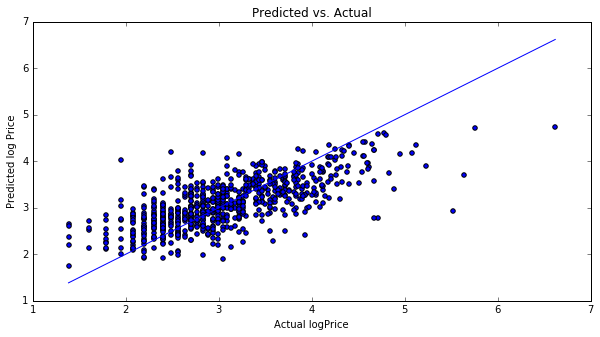

In [68]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(valid_y,y_pred )
plt.plot([min(valid_y ), max(valid_y )], [min(valid_y ), max(valid_y )])
plt.title('Predicted vs. Actual')
plt.xlabel('Actual logPrice')
plt.ylabel('Predicted log Price')
plt.show()


In [69]:
cv_score = np.sqrt(-cross_val_score(ridgereg, 
                                    X, 
                                    y, 
                                    cv=2, 
                                    scoring = "neg_mean_squared_error"))
print("RMSE Score: {}".format(cv_score.mean()))

RMSE Score: 0.566602229706


# SVR

In [70]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [71]:
parameters = {'kernel': ('linear', 'rbf'), 'C':[1.5, 10],'gamma': [0.1,10],'epsilon':[1,0.1]}
svr = SVR()
clf = GridSearchCV(svr, parameters)
clf.fit(train_X,train_y)
clf.best_params_

C:\Users\VPVU2\Anaconda3\envs\tutorial\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'C': 10, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}

In [72]:
regressor=SVR(kernel='linear',C=1.5,gamma=0.1,epsilon=1.0)
regressor.fit(train_X,train_y)
pred=regressor.predict(valid_X)
print(regressor.score(valid_X,valid_y))


0.2613508084831657


In [73]:
print(regressor.score(train_X,train_y))

0.4213107061104795


In [74]:
from sklearn.model_selection import cross_val_score

cv_score = np.sqrt(-cross_val_score(regressor, 
                                    X, 
                                    y, 
                                    cv=2, 
                                    scoring = "neg_mean_squared_error"))

print("RMSE Score: {}".format(cv_score.mean()))

RMSE Score: 0.652788880837


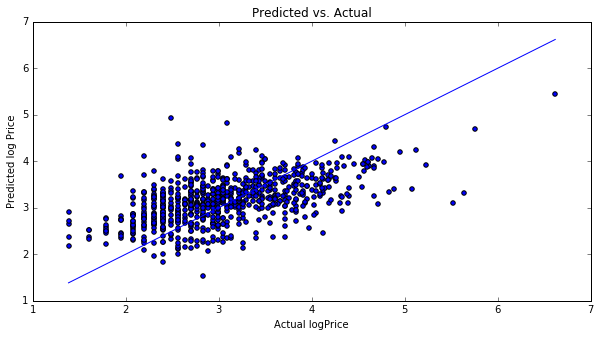

In [75]:
y_pred = regressor.predict(valid_X)
plt.figure(figsize=(10, 5))
plt.scatter(valid_y , y_pred)
plt.plot([min(valid_y ), max(valid_y )], [min(valid_y ), max(valid_y )])
plt.title('Predicted vs. Actual')
plt.xlabel('Actual logPrice')
plt.ylabel('Predicted log Price')
plt.show()
